In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import (
    dump,
    load,
)

from lib.format_feature_names import format_feature_name
from lib.partial_dependence import (
    adjust_plot,
    get_display_kw,
)
from lib.pu import (
    COLUMNS_TO_DROP,
    CORRELATED_COLUMNS,
    PRESERVATION_COLUMNS,
)

from sklearn.inspection import PartialDependenceDisplay

# Suppress FutureWarning for some versions of Scikit-learn
%env PYTHONWARNINGS=ignore::FutureWarning

warnings.simplefilter("ignore", FutureWarning)

env: PYTHONWARNINGS=ignore::FutureWarning


In [2]:
n_jobs = 8

In [3]:
classifier_filename = "outputs/pu_classifier.joblib"
training_filename = "training_data.csv"
pd_filename = "outputs/partial_dependence.joblib"

classifier = load(classifier_filename)
df_training = pd.read_csv(training_filename)

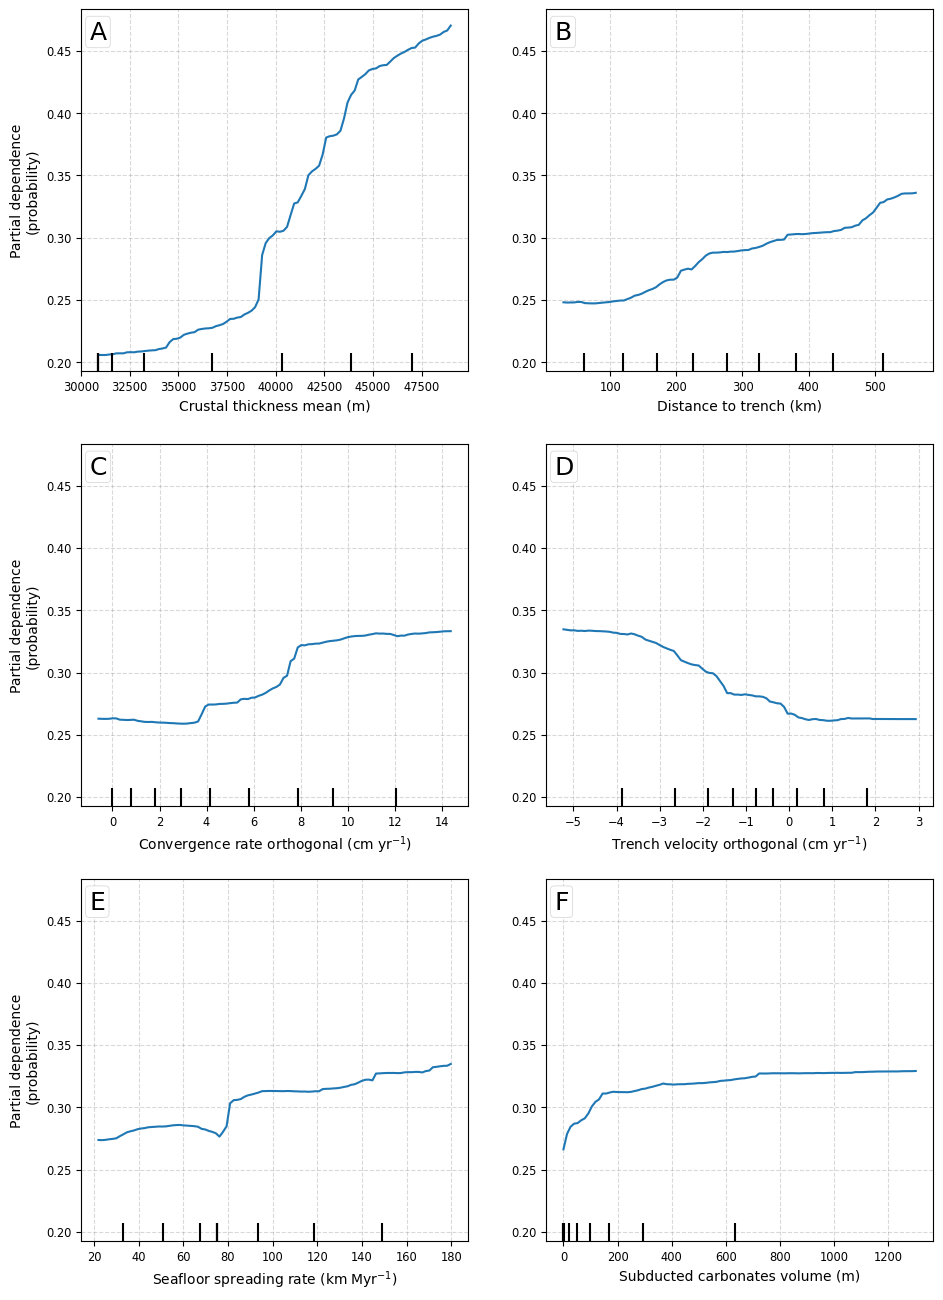

In [4]:
if os.path.isfile(pd_filename):
    disp = load(pd_filename)
    if not isinstance(disp, PartialDependenceDisplay):
        raise TypeError(
            "Invalid type: {}".format(type(disp))
        )
    plt.close("all")  # Jupyter sometimes displays the plot multiple times
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp.plot(ax=np.ravel(axs))
else:
    disp_kwargs = get_display_kw(
        classifier=classifier,
        data=df_training,
        n_jobs=n_jobs,
    )
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp = PartialDependenceDisplay.from_estimator(
        ax=np.ravel(axs),
        verbose=True,
        **disp_kwargs,
    )
    dump(disp, pd_filename)

adjust_plot(axs)

for ext in (".png", ".pdf"):
    fig.savefig(
        "outputs/figures/partial_dependence" + ext,
        dpi=350,
        bbox_inches="tight",
    )